In [174]:
# Lenin Kamma 
# Improve a marketing promotion
# Import libraries
 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [175]:
# Import file into a dataframe
dodgers_df = pd.read_csv("C:/Lenin Data Science/DSC630/dodgers.csv")

In [176]:
# View data
dodgers_df.describe()

,day,attend,temp
count,81.000000,81.000000,81.000000
mean,16.135802,41040.074074,73.148148
std,9.605666,8297.539460,8.317318
min,1.000000,24312.000000,54.000000
25%,8.000000,34493.000000,67.000000
50%,15.000000,40284.000000,73.000000
75%,25.000000,46588.000000,79.000000
max,31.000000,56000.000000,95.000000


In [177]:
dodgers_df

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO
...,...,...,...,...,...,...,...,...,...,...,...,...
76,SEP,29,40724,Saturday,Rockies,84,Cloudy,Night,NO,NO,NO,NO
77,SEP,30,35607,Sunday,Rockies,95,Clear,Day,NO,NO,NO,NO
78,OCT,1,33624,Monday,Giants,86,Clear,Night,NO,NO,NO,NO
79,OCT,2,42473,Tuesday,Giants,83,Clear,Night,NO,NO,NO,NO


In [178]:
#Since there are many catagorical variables,use one hot encoding to convert them into numeric
dodgers_df = pd.get_dummies(data=dodgers_df, columns=["month","day_night","opponent","day_of_week","skies","fireworks",'bobblehead','cap','shirt'])

In [179]:
# View data
dodgers_df.head(81)

,day,attend,temp,month_APR,month_AUG,month_JUL,month_JUN,month_MAY,month_OCT,month_SEP,...,skies_Clear,skies_Cloudy,fireworks_NO,fireworks_YES,bobblehead_NO,bobblehead_YES,cap_NO,cap_YES,shirt_NO,shirt_YES
0,10,56000,67,1,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
1,11,29729,58,1,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0
2,12,28328,57,1,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0
3,13,31601,54,1,0,0,0,0,0,0,...,0,1,0,1,1,0,1,0,1,0
4,14,46549,57,1,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,29,40724,84,0,0,0,0,0,0,1,...,0,1,1,0,1,0,1,0,1,0
77,30,35607,95,0,0,0,0,0,0,1,...,1,0,1,0,1,0,1,0,1,0
78,1,33624,86,0,0,0,0,0,1,0,...,1,0,1,0,1,0,1,0,1,0
79,2,42473,83,0,0,0,0,0,1,0,...,1,0,1,0,1,0,1,0,1,0


In [180]:
# Assign features to x variable
# Assign response or features to y variable
X = dodgers_df[['day','temp','month_APR','month_AUG','month_JUL','month_JUN','month_MAY','month_OCT',"month_SEP",'day_of_week_Monday','day_of_week_Saturday','day_of_week_Sunday','day_of_week_Thursday','day_of_week_Tuesday','day_of_week_Wednesday','day_of_week_Friday','skies_Clear ','skies_Cloudy','opponent_Angels', 'opponent_Astros',
       'opponent_Braves', 'opponent_Brewers', 'opponent_Cardinals',
       'opponent_Cubs', 'opponent_Giants', 'opponent_Marlins', 'opponent_Mets',
       'opponent_Nationals', 'opponent_Padres', 'opponent_Phillies',
       'opponent_Pirates', 'opponent_Reds', 'opponent_Rockies',
       'opponent_Snakes', 'opponent_White Sox','fireworks_NO','fireworks_YES','bobblehead_NO','bobblehead_YES','cap_NO','cap_YES','shirt_YES','shirt_NO']]
y = dodgers_df['attend']

In [181]:
# Split data into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=0)

In [182]:
# Develop regression models
regression_model = LinearRegression()  
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [183]:
# View test data
X_test

,day,temp,month_APR,month_AUG,month_JUL,month_JUN,month_MAY,month_OCT,month_SEP,day_of_week_Monday,...,opponent_Snakes,opponent_White Sox,fireworks_NO,fireworks_YES,bobblehead_NO,bobblehead_YES,cap_NO,cap_YES,shirt_YES,shirt_NO
22,20,77,0,0,0,0,1,0,0,0,...,0,0,1,0,1,0,1,0,0,1
27,29,74,0,0,0,0,1,0,0,0,...,0,0,1,0,0,1,1,0,0,1
61,24,71,0,1,0,0,0,0,0,0,...,0,0,0,1,1,0,1,0,0,1
13,8,75,0,0,0,0,1,0,0,0,...,0,0,1,0,1,0,1,0,0,1
71,13,80,0,0,0,0,0,0,1,0,...,0,0,1,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39,1,75,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,1,0,0,1
65,31,77,0,1,0,0,0,0,0,0,...,1,0,0,1,1,0,1,0,0,1
58,20,80,0,1,0,0,0,0,0,1,...,0,0,1,0,1,0,1,0,0,1
12,7,67,0,0,0,0,1,0,0,1,...,0,0,1,0,1,0,1,0,0,1


In [184]:
y_test

22    44005
27    51137
61    39805
13    32799
71    43309
      ...  
39    55359
65    37622
58    36878
12    43713
70    50560
Name: attend, Length: 73, dtype: int64

In [185]:
# Create coefficients
dodgers_coeff = pd.DataFrame(regression_model.coef_,X.columns,columns=["Coefficient"])  
dodgers_coeff

,Coefficient
day,276.855787
temp,-317.204843
month_APR,-678.176047
month_AUG,2272.175058
month_JUL,4636.967468
month_JUN,-1600.764602
month_MAY,-2856.510599
month_OCT,0.000000
month_SEP,-1773.691279
day_of_week_Monday,0.000000


In [186]:
# Create prediction dataframe
y_pred = regression_model.predict(X_test)

In [187]:
# Check predicted values
y_pred

array([35283.92398015, 51623.9335475 , 46018.93557748, 39576.53086914,
       35922.23999853, 32404.47656805, 41533.01335648, 39857.29621361,
       41312.1303957 , 43397.79152346, 60527.52672319, 43841.99313948,
       48252.54259132, 40923.11320636, 30476.66057691, 46893.12142409,
       38824.98357396, 35071.66633448, 47271.75421489, 47702.35584209,
       40887.01521262, 49991.01612325, 40023.28086253, 36478.06386574,
       44644.63365928, 46038.99281804, 48492.3173422 , 31907.13297557,
       37747.75337047, 43661.43558579, 47600.40229872, 48315.51009569,
       54220.56806627, 41450.65237947, 48083.43823765, 42347.48439184,
       45220.32246797, 43083.90969369, 37213.05437585, 44973.56382004,
       50878.77812586, 50710.76990857, 46536.33641051, 34655.53292124,
       45627.65033844, 42403.92977293, 36356.6656009 , 38771.94125803,
       39570.55436754, 50190.3802797 , 45851.38386824, 46230.93277332,
       52618.58954183, 46080.73016284, 39517.22774272, 42598.64794103,
      

In [188]:
# Create a dataframe with predicted and actual values
dodgers_final_train = pd.DataFrame({'Actual Values': y_test, 'Predicted Values': y_pred})
dodgers_final_train

,Actual Values,Predicted Values
22,44005,35283.923980
27,51137,51623.933548
61,39805,46018.935577
13,32799,39576.530869
71,43309,35922.239999
...,...,...
39,55359,45323.524089
65,37622,47227.305407
58,36878,44091.196986
12,43713,39487.049055


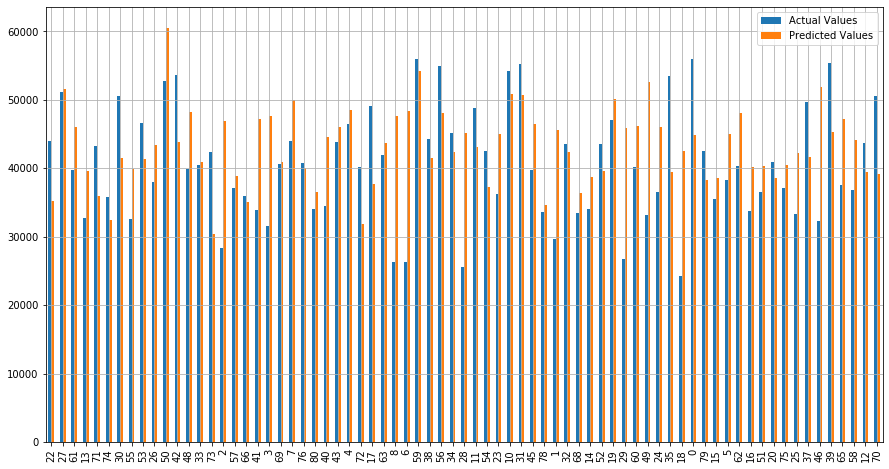

In [189]:
dodgers_final_train.plot(kind='bar',figsize=(15,8))
plt.grid(which='major', linestyle='-', linewidth='0.8')
plt.grid(which='minor', linestyle=':', linewidth='0.8')
plt.show()

In [190]:
# Find the mean absolute errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 7567.7567853161745
Mean Squared Error: 88929357.4165203
Root Mean Squared Error: 9430.23633937773


In [191]:
# Find the mean of the attendance
dodgers_df["attend"].mean()

41040.07407407407

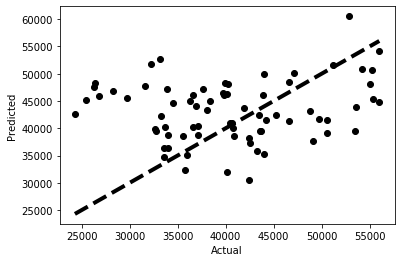

In [192]:
# Plot a scatter plot with the actual and predicted values
plt.scatter(y_test, y_pred,  color='black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [193]:
# Find out the R score
metrics.r2_score(y_test, y_pred)

-0.35669782904554426

In [194]:
# Conclusions
# The linear regression model has R value of -0.3566, which is not close to 1. So the model is not that great
# The fact that the model is not that good is reiterated by the fact that the root mean square error (9430) is more than 20% of Mean the
# So there are other variables(predictors) which are not part of the dataset are influencing the attendance
# Based on the coefficient values above for each variables, The best time to run marketing campaign is
###  Any Sundays in May when Cardinals are played as opponents and when the temparature is low and game is played in the night ####